In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



## read the data set 


In [23]:
df = pd.read_csv(r'F:\level 2\semester 4\ML\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## explore


In [24]:
df.info()
# age change to int sex change to 0 and 1 
#feature Enginering to Pclass cabin embarked 
# turn sex ti 0 and 1 
#remove na

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### handle Na

In [25]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df= df.drop(columns=['Cabin','PassengerId','Name','Ticket'])

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### correct data types

In [26]:
df['Age']=df['Age'].round().astype("int")
df['Survived']=df['Survived'].round().astype("int")

### turn catogrical data into numerical 

In [27]:
train_categorical_features = ['Pclass', 'Sex', 'Embarked']

# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series

for feature in train_categorical_features:
    dummies = pd.get_dummies(df[feature]).add_prefix(feature + '_')
    df = df.drop(columns=[feature])  # Drop the original categorical feature

    df = df.join(dummies)

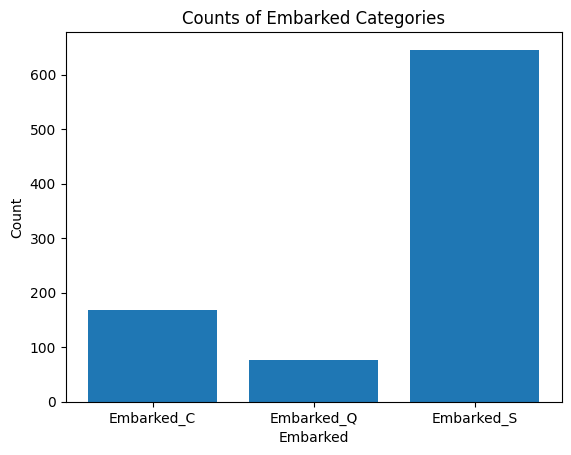

In [28]:
x = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

# Count how many 1s are in each column
counts = [df[col].sum() for col in x]

# Plot
plt.bar(x, counts)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Counts of Embarked Categories')
plt.show()


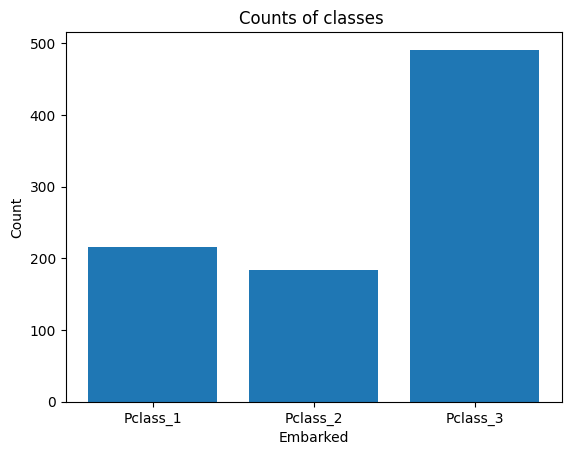

[216, 184, 491]


In [29]:
cols=['Pclass_1','Pclass_2','Pclass_3']
counts = [df[col].sum() for col in cols]

# Plot
plt.bar(cols, counts)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Counts of classes ')
plt.show()
print(counts)

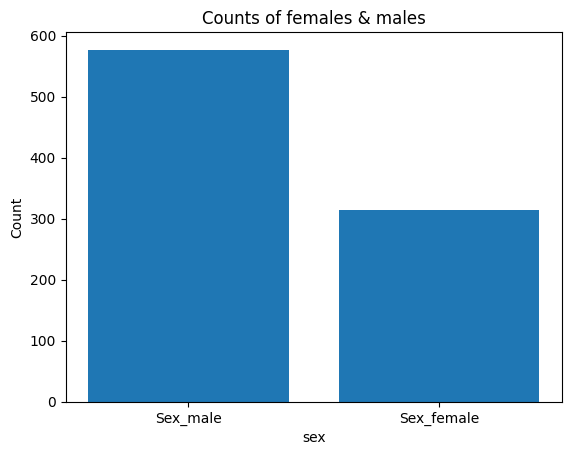

[577, 314]

In [30]:
column3 = ['Sex_male', 'Sex_female']

# Count how many 1s are in each column
counts3 = [df[col3].sum() for col3 in column3]

# Plot
plt.bar(column3, counts3)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Counts of females & males')
plt.show()
counts3

In [31]:
df=df.drop(columns=['Embarked_Q','Sex_female']) # as they do not give any new information 

In [32]:
df.columns  #Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
             #'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_S'],
             # dtype='object')
# columns that we are going to work with 

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_C', 'Embarked_S'],
      dtype='object')

In [33]:
#Separate features and target
X = df.drop(columns='Survived')  #all columns expect output column
y = df['Survived']


## split the data  for  Machine Learning ALgortihms

In [34]:
# Split: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #make 2 parts train and temp then sepearete temp into test and vaild 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # divide temp to train and validation


In [35]:
# Identify numerical features to be scaled
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
# Fit scaler on training data and transform
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])
# Transform validation and test sets
X_val_scaled=X_val.copy()
X_val_scaled[numerical_features] = scaler.transform(X_val_scaled[numerical_features]) # without fitting to avoid cheating
X_test_scaled=X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

# KNN algorithm 
## find the best K

In [36]:
# Hyperparameter tuning with validation set
k_range = range(1, 21)  #range for Test the model performance by trying different values of K.
val_accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    val_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, val_pred)
    val_accuracies.append(acc)
 
# Find best K  # #Test the model performance by trying different values of K and find best k. 
best_k = k_range[np.argmax(val_accuracies)]
print(f"Best K from validation set: {best_k}")
print(f"Validation Accuracy with best K: {max(val_accuracies):.4f}")


Best K from validation set: 5
Validation Accuracy with best K: 0.8315


## use the test data set

In [37]:
# Evaluate Best k-Nearest-Neighbor on test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train) #give him training data to fit k-nearest on it 
test_pred = best_knn.predict(X_test_scaled) #give it test data to find predicted out put for it
test_accuracy = accuracy_score(y_test, test_pred) 
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8156


## use cross validation & Oversampling to reduce the probability of Overfitting


In [38]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

#   combine training data with validation data and call them temp to calculate cross c
X_temp_scaled = X_temp.copy() # validation data + training data 
X_temp_scaled[numerical_features] = scaler.fit_transform(X_temp_scaled[numerical_features])

# 2. إعداد الـ KNN
knn = KNeighborsClassifier(n_neighbors=best_k)

# 3. Cross-Validation (5-Fold)
cv_scores = cross_val_score(knn, X_temp_scaled, y_temp, cv=5, scoring='accuracy')

# اطبعي النتايج
print("Cross-Validation Accuracies:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

from imblearn.over_sampling import SMOTE #OVer sampling

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_temp_scaled, y_temp)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

y_pred = knn.predict(X_test_scaled)
test_accuracy = knn.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Accuracies: [0.76923077 0.76923077 0.85211268 0.80985915 0.82394366]
Average CV Accuracy: 0.8048754062838569
Standard Deviation: 0.032127483818053755
Test Accuracy: 0.7988826815642458


In [39]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.86      0.81      0.83       110
    Survived       0.72      0.78      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



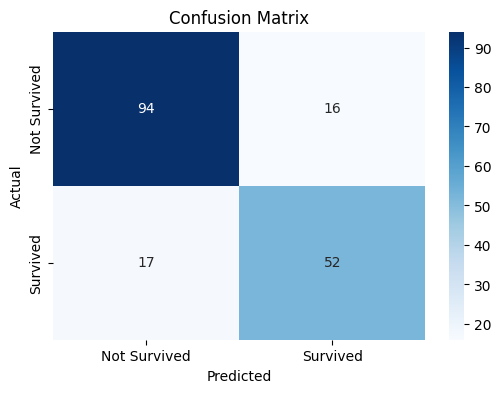


Classification Report:
              precision    recall  f1-score   support

Not Survived       0.85      0.85      0.85       110
    Survived       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8156
Precision: 0.7647
Recall: 0.7536
F1-Score: 0.7591


In [40]:
# Confusion Matrix and Metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set (already done as test_pred)
# Generate confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print metrics
print("\nClassification Report:")
print(classification_report(y_test, test_pred, target_names=['Not Survived', 'Survived']))

# Extract and print individual metrics
accuracy = accuracy_score(y_test, test_pred)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])  # TP / (TP + FP)
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])     # TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Explained Variance Ratio (2D PCA): [0.31395018 0.25590288]


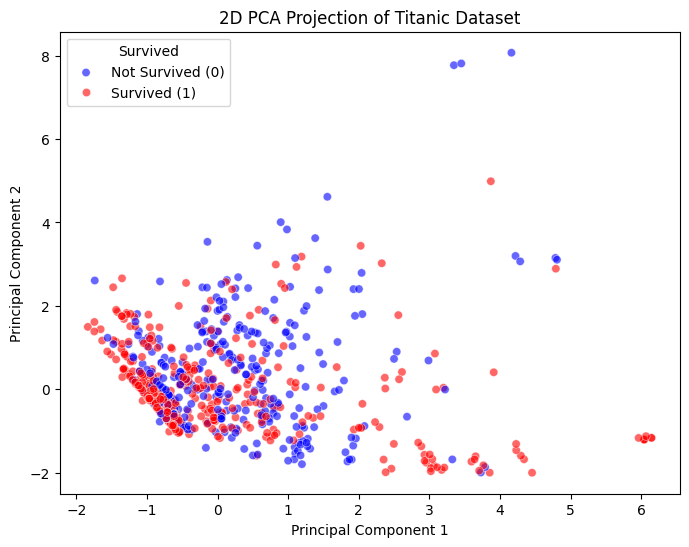

C:\Users\user\AppData\Local\Temp\ipykernel_12596\2416168206.py:38: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  legend1 = fig.legend(*scatter.legend_elements(), title='Survived', loc='upper right', labels=['Not Survived (0)', 'Survived (1)'])


Explained Variance Ratio (3D PCA): [0.31395018 0.25590288 0.14019217]


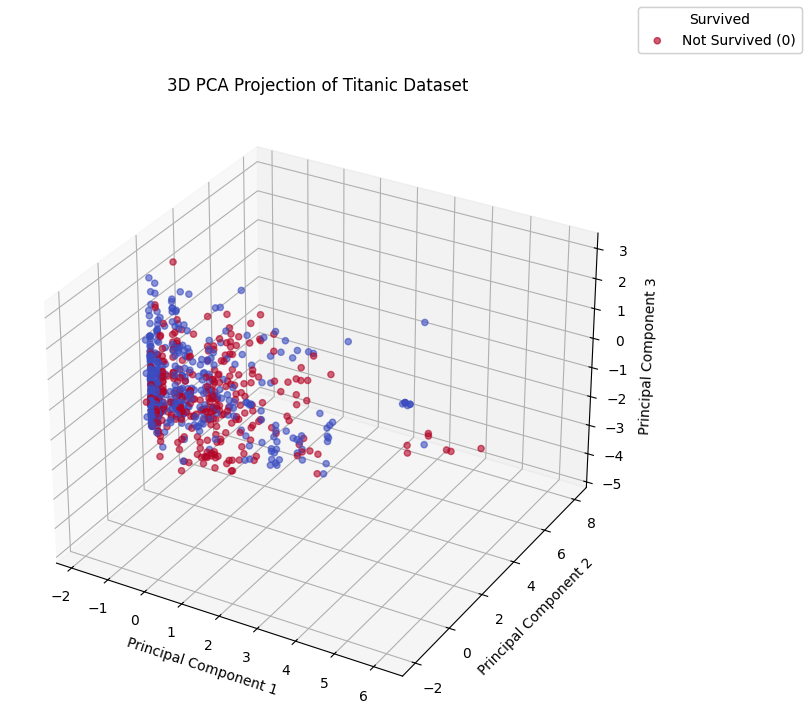

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Assume X_train_scaled, y_train, X_test_scaled, y_test are available
# Combine train and test for visualization (optional, for more data points)
X_all = np.vstack([X_temp_scaled, X_test_scaled])
y_all = np.hstack([y_temp, y_test])


# --- Option 2: 2D PCA Plot ---
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_all)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y_all, palette={0: 'red', 1: 'blue'}, alpha=0.6)
plt.title('2D PCA Projection of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
print(f"Explained Variance Ratio (2D PCA): {pca_2d.explained_variance_ratio_}")
plt.show()

# --- Option 3: 3D PCA Plot ---
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_all)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_all, cmap='coolwarm', alpha=0.6)
ax.set_title('3D PCA Projection of Titanic Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = fig.legend(*scatter.legend_elements(), title='Survived', loc='upper right', labels=['Not Survived (0)', 'Survived (1)'])
fig.add_artist(legend1)
print(f"Explained Variance Ratio (3D PCA): {pca_3d.explained_variance_ratio_}")
plt.show()